# Electron Tag and Probe using the Z boson

- Repository: https://github.com/ku-cms/LeptonStudies
- CERN SWAN platform: https://swan.cern.ch/
- CERN SWAN info: https://swan.web.cern.ch/swan/
- NANO AOD documentation page: https://cms-nanoaod-integration.web.cern.ch/autoDoc/
- CMS Data Aggregation System (DAS): https://cmsweb.cern.ch/das/

In [1]:
# import libraries
import uproot
from glob import glob
import awkward as ak
import numpy as np
from coffea.nanoevents import NanoEventsFactory

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep

# set up mplhep
mplhep.style.use(mplhep.style.CMS)

# print coffea version
import coffea
print(f"coffea version:")
print(coffea.__version__)

coffea version:
0.7.21


In [2]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [3]:
# Load dataset files

# Important:
# To load datasets, set the "base_directory" path based on the computing cluster (SWAN or Purdue).

# SWAN
base_directory = "/eos/user/c/cmsdas/2024/short-ex-egm/datasets/"

# Purdue
#base_directory = "/work/projects/hats2024/egamma/datasets/"

# DY
dy_files = sorted(glob(f"{base_directory}DYto2L-2Jets_MLL-50_TuneCP5_13p6TeV-amcatnloFXFX-pythia8/*.root"))

# Data (EGamma trigger)
data_files = sorted(glob(f"{base_directory}EGamma1_Run2023C/*.root"))

n_dy_files = len(dy_files)
example_dy_file = dy_files[0]
open_dy_file = uproot.open(example_dy_file)

n_data_files = len(data_files)
example_data_file = data_files[0]
open_data_file = uproot.open(example_data_file)

print("Number of DY files: {0}".format(n_dy_files))
print("Number of EGamma Data files: {0}".format(n_data_files))
print("---------------------")
print("Example DY file path:")
print(example_dy_file)
print("Example DY file info:")
dict(open_dy_file)
print("---------------------")
print("Example data file path:")
print(example_data_file)
print("Example data file info:")
dict(open_data_file)


Number of DY files: 4
Number of EGamma Data files: 4
---------------------
Example DY file path:
/eos/user/c/cmsdas/2024/short-ex-egm/datasets/DYto2L-2Jets_MLL-50_TuneCP5_13p6TeV-amcatnloFXFX-pythia8/00da63ff-7a11-4939-b7d8-96610222c5c6.root
Example DY file info:
---------------------
Example data file path:
/eos/user/c/cmsdas/2024/short-ex-egm/datasets/EGamma1_Run2023C/033a4d07-3b5b-4d12-9374-5dc4ab55cc7b.root
Example data file info:


{'tag;1': <TObjString 'untagged' at 0x7f7c09847510>,
 'Events;1': <TTree 'Events' (1666 branches) at 0x7f7c0981ae50>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (5 branches) at 0x7f7c1b518e20>,
 'Runs;1': <TTree 'Runs' (1 branches) at 0x7f7c0981ad00>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f7c1b518d90>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f7c0981ab20>}

In [4]:
# Create NanoEventsFactory objects
dy_events = NanoEventsFactory.from_root(example_dy_file).events()
data_events = NanoEventsFactory.from_root(example_data_file).events()

In [5]:
# Print:
# - number of events
# - number of electrons
# - number of muons

# variables
n_events    = 0
n_electrons = 0
n_muons     = 0

# DY

# method 1
n_events    = len(dy_events.run)
n_electrons = len(ak.flatten(dy_events.Electron))
n_muons     = len(ak.flatten(dy_events.Muon))

# method 2
#n_events    = ak.num(dy_events.run, axis=0)
#n_electrons = sum(ak.num(dy_events.Electron, axis=1))
#n_muons     = sum(ak.num(dy_events.Muon, axis=1))

# per event (on average)
n_electrons_per_event = n_electrons / n_events
n_muons_per_event     = n_muons / n_events

print("Sample: DY, 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))

# Data

# method 1
n_events    = len(data_events.run)
n_electrons = len(ak.flatten(data_events.Electron))
n_muons     = len(ak.flatten(data_events.Muon))

# method 2
#n_events    = ak.num(data_events.run, axis=0)
#n_electrons = sum(ak.num(data_events.Electron, axis=1))
#n_muons     = sum(ak.num(data_events.Muon, axis=1))

# per event (on average)
n_electrons_per_event = n_electrons / n_events
n_muons_per_event     = n_muons / n_events

print("Sample: Data (EGamma trigger), 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))

#dy_events.Electron.fields
#data_events.Electron.fields

Sample: DY, 2023
 - Number of events: 864039
 - Number of electrons: total = 587200, per event (avg.) = 0.68
 - Number of muons: total = 610675, per event (avg.) = 0.71
Sample: Data (EGamma trigger), 2023
 - Number of events: 1520620
 - Number of electrons: total = 1559364, per event (avg.) = 1.03
 - Number of muons: total = 467540, per event (avg.) = 0.31


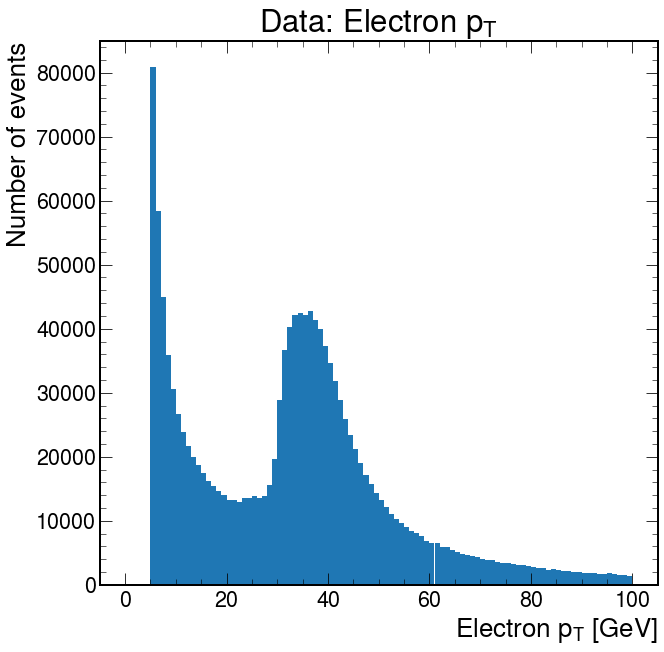

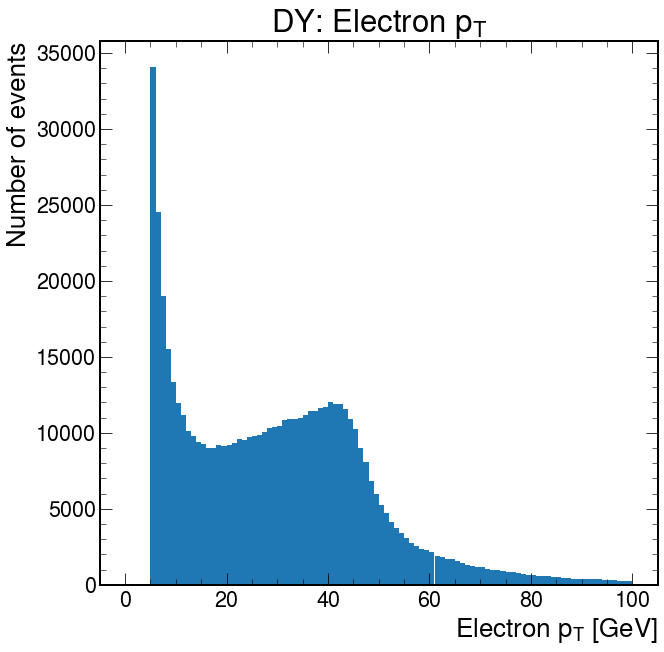

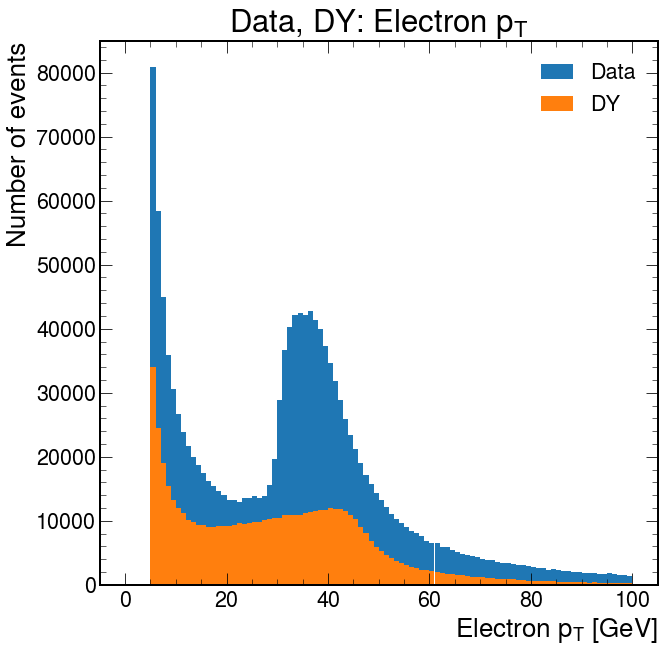

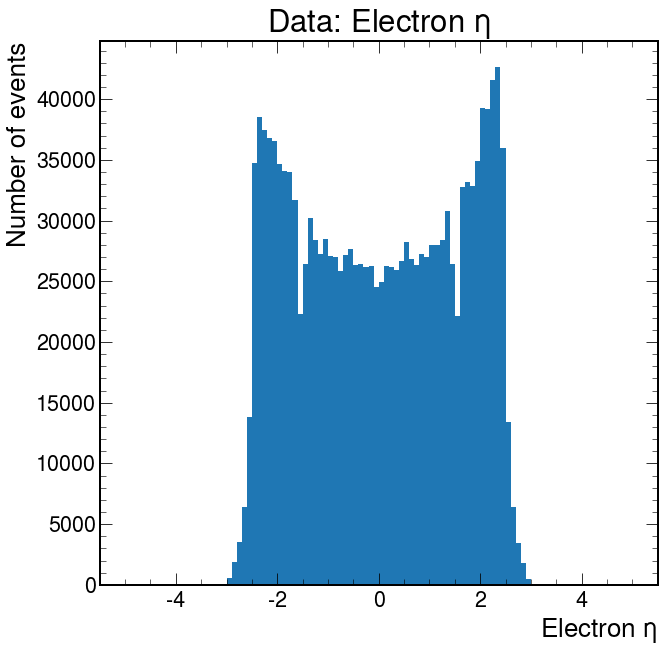

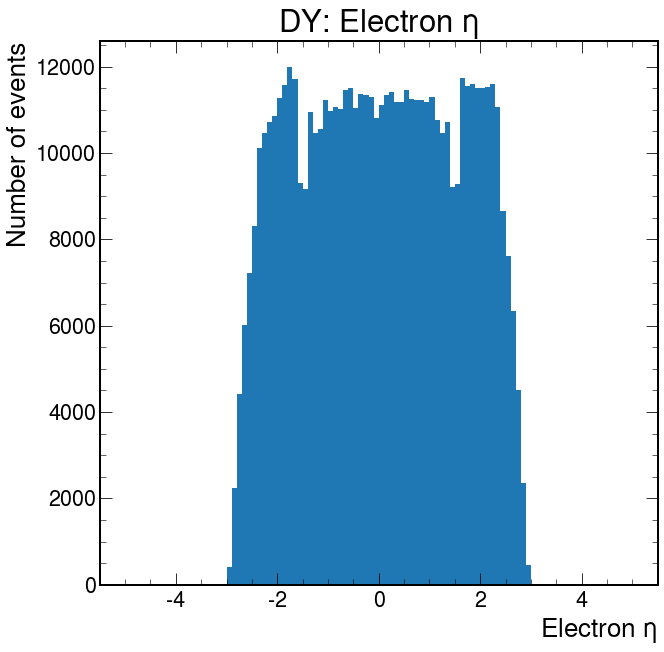

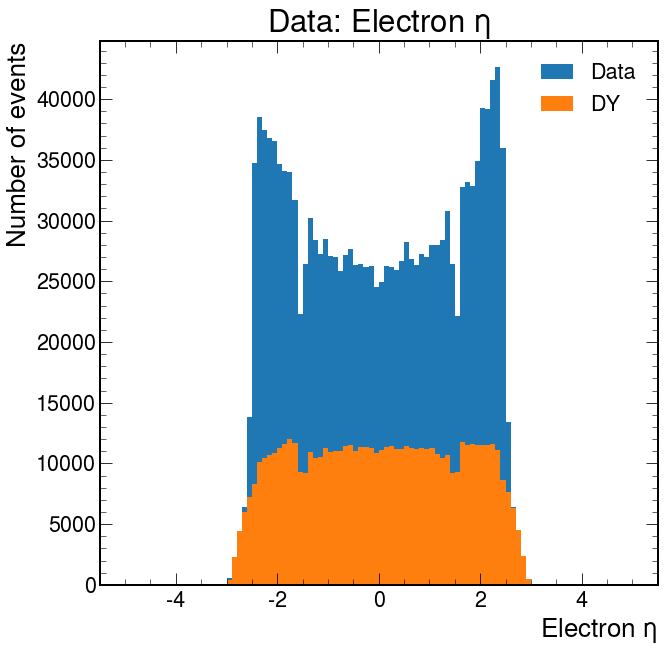

In [17]:
# Electron pT

# Data
fig, ax = plt.subplots()
ax.set_title(r"Data: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.pt), bins=np.linspace(0, 100, 101), linestyle="solid")

# DY
fig, ax = plt.subplots()
ax.set_title(r"DY: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(dy_events.Electron.pt), bins=np.linspace(0, 100, 101))

# Data, DY
fig, ax = plt.subplots()
ax.set_title(r"Data, DY: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.pt), bins=np.linspace(0, 100, 101), label="Data")
ax.hist(ak.flatten(dy_events.Electron.pt), bins=np.linspace(0, 100, 101), label="DY")
ax.legend(loc='upper right')

# Electron eta

# Data
fig, ax = plt.subplots()
ax.set_title(r"Data: Electron $\eta$")
ax.set_xlabel(r"Electron $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.eta), bins=np.linspace(-5, 5, 101))

# DY
fig, ax = plt.subplots()
ax.set_title(r"DY: Electron $\eta$")
ax.set_xlabel(r"Electron $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(dy_events.Electron.eta), bins=np.linspace(-5, 5, 101))

# Data, DY
fig, ax = plt.subplots()
ax.set_title(r"Data: Electron $\eta$")
ax.set_xlabel(r"Electron $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.eta), bins=np.linspace(-5, 5, 101), label="Data")
ax.hist(ak.flatten(dy_events.Electron.eta), bins=np.linspace(-5, 5, 101), label="DY")
ax.legend(loc='upper right')

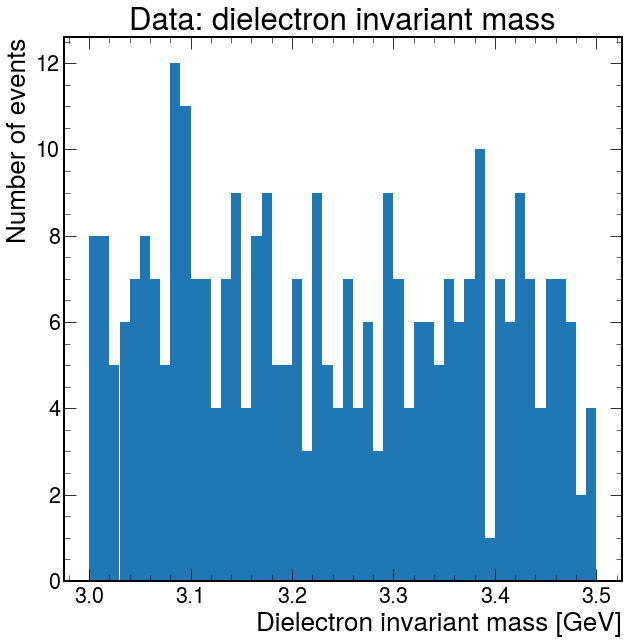

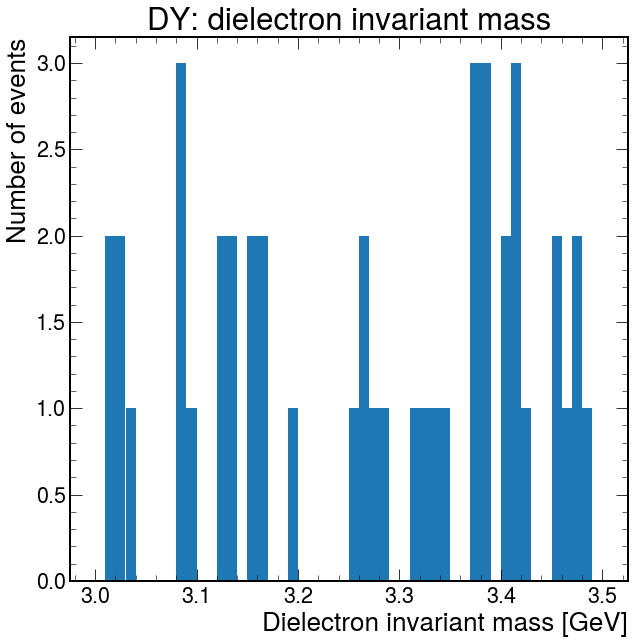

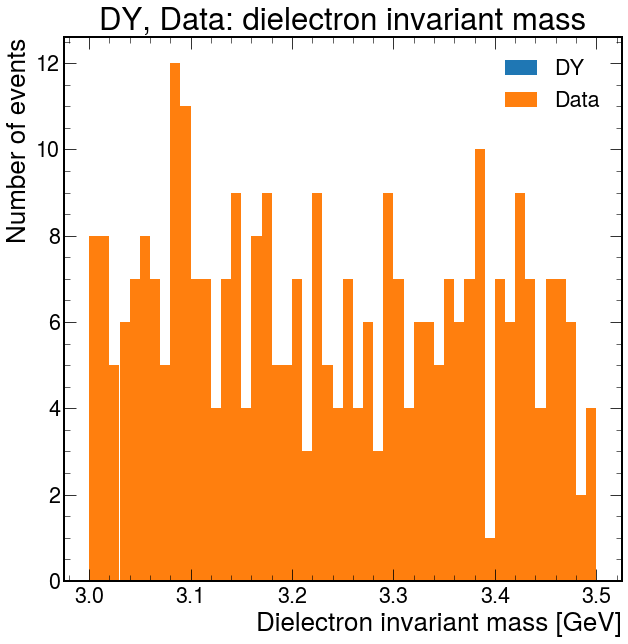

In [14]:
# electrons: dielectron mass

# Full range
# mass_min = 0
# mass_max = 200
# mass_nbins = 200

# Z mass peak
# mass_min = 50
# mass_max = 130
# mass_nbins = 80

# J/psi mass peak
mass_min = 3.0
mass_max = 3.5
mass_nbins = 50

# Data
fig, ax = plt.subplots()
ax.set_title(r"Data: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
event_cut = ak.all(data_events.Electron.r9 > 0.96, axis=1)
#ee = ak.combinations(data_events.Electron, 2, fields = ["e0", "e1"])
ee = ak.combinations(data_events[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(mass_min, mass_max, mass_nbins + 1));

# DY
fig, ax = plt.subplots()
ax.set_title(r"DY: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
event_cut = ak.all(dy_events.Electron.r9 > 0.96, axis=1)
#ee = ak.combinations(dy_events.Electron, 2, fields = ["e0", "e1"])
ee = ak.combinations(dy_events[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(mass_min, mass_max, mass_nbins + 1));

# DY, Data
fig, ax = plt.subplots()
ax.set_title(r"DY, Data: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
# Data
data_event_cut = ak.all(data_events.Electron.r9 > 0.96, axis=1)
data_ee        = ak.combinations(data_events[data_event_cut].Electron, 2, fields=["e0", "e1"])
data_mass      = (data_ee.e0 + data_ee.e1).mass
# DY
dy_event_cut = ak.all(dy_events.Electron.r9 > 0.96, axis=1)
dy_ee        = ak.combinations(dy_events[dy_event_cut].Electron, 2, fields=["e0", "e1"])
dy_mass      = (dy_ee.e0 + dy_ee.e1).mass
# Combined plot
ax.hist(ak.flatten(dy_mass), bins=np.linspace(mass_min, mass_max, mass_nbins + 1), label="DY");
ax.hist(ak.flatten(data_mass), bins=np.linspace(mass_min, mass_max, mass_nbins + 1), label="Data");
ax.legend(loc='upper right')